In [1]:
%pwd

'/home/analyst/notebooks'

In [2]:
%ls

'#logistic-regression-numpy.ipynb'*   file.d*
'Classifying non linear data.ipynb'   file.db*
 Dockerfile*                          lib/
 MLP.ipynb                            models/
 ModelGraph.html                      neural_net/
'OLS with tf.ipynb'*                  pure_numpy_clean.ipynb*
 active_funcs.ipynb                   pure_numpy_clean.py*
 autodiff_reverse_mode.jpeg*          readme.md*
 data/                                tf_logs/


In [3]:
%cd notebooks/

[Errno 2] No such file or directory: 'notebooks/'
/home/analyst/notebooks


/home/analyst/dlenv/lib/python3.11/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [4]:
%ls 

'#logistic-regression-numpy.ipynb'*   file.d*
'Classifying non linear data.ipynb'   file.db*
 Dockerfile*                          lib/
 MLP.ipynb                            models/
 ModelGraph.html                      neural_net/
'OLS with tf.ipynb'*                  pure_numpy_clean.ipynb*
 active_funcs.ipynb                   pure_numpy_clean.py*
 autodiff_reverse_mode.jpeg*          readme.md*
 data/                                tf_logs/


In [5]:
%ls -l neural_net/

total 32
-rwxrwxrwx 1 root    root     190 Feb 18 22:28 __init__.py*
drwxr-xr-x 1 analyst analyst  512 Feb 20 13:36 __pycache__/
-rwxrwxrwx 1 root    root    3187 Feb 20 13:38 activation_funcs.py*
-rwxrwxrwx 1 root    root    1204 Feb 20 13:01 architecture.py*
-rwxrwxrwx 1 root    root     858 Feb 20 02:45 create_tables.sql*
-rwxrwxrwx 1 root    root     620 Feb 20 13:15 db.py*
-rwxrwxrwx 1 root    root     214 Feb 18 05:07 init_funcs.py*
-rwxrwxrwx 1 root    root    2616 Feb 20 13:40 layers.py*
-rwxrwxrwx 1 root    root    1378 Feb 20 11:23 loss.py*
-rwxrwxrwx 1 root    root     368 Feb 20 12:33 metrics.py*
drwxrwxrwx 1 root    root     512 Feb 20 13:36 run/
-rwxrwxrwx 1 root    root    2102 Feb 20 13:17 utils.py*


In [6]:
from neural_net import *
import matplotlib.pyplot as plt
import numpy

# linear data

In [7]:
n,k = 1000,2
X = numpy.random.uniform(-10,10,(n,k))
X.shape

(1000, 2)

In [8]:
y = (X[:,0] + X[:,1] < numpy.random.uniform(1,7,(n,))).reshape(-1,1)+0
y.shape

(1000, 1)

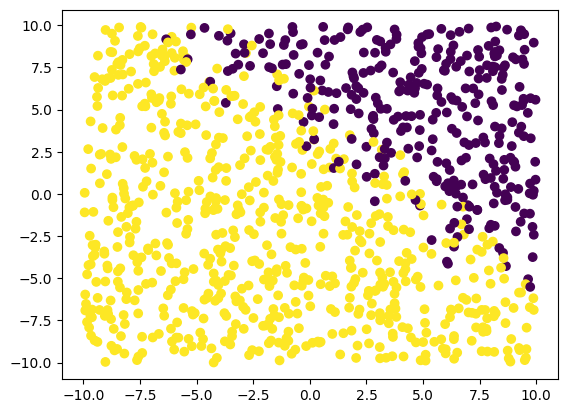

In [9]:
plt.scatter(x=X[:,0],y=X[:,1],c=y)

## Logistic regression

In [10]:
LogisticRegressor = architecture.Sequential(
        [
        layers.fullyconnected(n_out=1),
        layers.activation(func=activation_funcs.σ,cost_func=loss.binaryCrossEntropy)
        ]
    )

In [11]:
LogisticRegressor.train(X,y,
                        α=.01,
                        n_epochs=10,
                        metrics=metrics.accuracy)

epoch 0 <class 'neural_net.metrics.accuracy'> 0.322
epoch 1 <class 'neural_net.metrics.accuracy'> 0.818
epoch 2 <class 'neural_net.metrics.accuracy'> 0.322
epoch 3 <class 'neural_net.metrics.accuracy'> 0.322
epoch 4 <class 'neural_net.metrics.accuracy'> 0.322
epoch 5 <class 'neural_net.metrics.accuracy'> 0.322


/home/analyst/notebooks/neural_net/loss.py:11: RuntimeWarning: invalid value encountered in divide
  self. pr = -(self.y/self.p - (1-self.y)/(1-self.p))


epoch 6 <class 'neural_net.metrics.accuracy'> 0.322
epoch 7 <class 'neural_net.metrics.accuracy'> 0.322
epoch 8 <class 'neural_net.metrics.accuracy'> 0.322
epoch 9 <class 'neural_net.metrics.accuracy'> 0.322


In [58]:
LogisticRegressor.steps[-2].Δ

{2034965529488: array([5.2409732])}

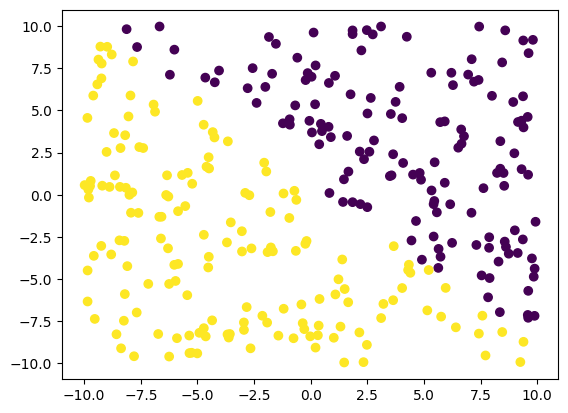

In [13]:
_,p = LogisticRegressor.predict(X)[0]
plt.scatter(x=X[:,0],y=X[:,1],c=(p>.5)+0)

## Softmax

In [14]:
SoftmaxRegressor = architecture.Sequential(
        [
        layers.fullyconnected(n_out=1,k=2),
        layers.activation(func=activation_funcs.Softmax,cost_func=loss.CrossEntropy)
        ]
    )
class accuracy(metrics.accuracy):
    def __init__(self,y,p):
        _,p =p[0]
        p=p.argmax(axis=1)
        y = y.argmax(axis=1)
        self.p,self.y = p,y

SoftmaxRegressor.train(X,utils.onehot(y),
                        α=.001,
                        n_epochs=10,
                        metrics=accuracy)

epoch 0 <class '__main__.accuracy'> 0.93
epoch 1 <class '__main__.accuracy'> 0.44333333333333336


c:\Users\Abdou\Desktop\data\Docker\volumes\deeplearning\deeplearning\neural_net\loss.py:11: RuntimeWarning: divide by zero encountered in divide
  self. pr = -(self.y/self.p - (1-self.y)/(1-self.p))
c:\Users\Abdou\Desktop\data\Docker\volumes\deeplearning\deeplearning\neural_net\loss.py:11: RuntimeWarning: invalid value encountered in divide
  self. pr = -(self.y/self.p - (1-self.y)/(1-self.p))


ValueError: zero-size array to reduction operation minimum which has no identity

In [21]:
SoftmaxRegressor.steps[-1].Δ

{1786246642064: array([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
     

## Neural Net

In [20]:
Network0 = architecture.Sequential(
        [
        layers.fullyconnected(n_out=1,init_method=init_funcs.XHsigmoid),
        layers.activation(func=activation_funcs.σ,cost_func=loss.binaryCrossEntropy),
        layers.fullyconnected(n_out=1,init_method=init_funcs.XHsigmoid),
        layers.activation(func=activation_funcs.σ,cost_func=loss.binaryCrossEntropy)
        ]
    )
class accuracy(metrics.accuracy):
    def __init__(self,y,p):
        _,p = p[0]
        self.y,self.p = y,p>.5

Network0.train(X,y,
              α=.3,
              n_epochs=100,
                metrics=accuracy)

epoch 0 <class '__main__.accuracy'> 0.6533333333333333
epoch 1 <class '__main__.accuracy'> 0.5566666666666666
epoch 2 <class '__main__.accuracy'> 0.5566666666666666
epoch 3 <class '__main__.accuracy'> 0.5566666666666666
epoch 4 <class '__main__.accuracy'> 0.5566666666666666
epoch 5 <class '__main__.accuracy'> 0.5566666666666666
epoch 6 <class '__main__.accuracy'> 0.5566666666666666
epoch 7 <class '__main__.accuracy'> 0.5566666666666666
epoch 8 <class '__main__.accuracy'> 0.5566666666666666
epoch 9 <class '__main__.accuracy'> 0.5566666666666666
epoch 10 <class '__main__.accuracy'> 0.5566666666666666
epoch 11 <class '__main__.accuracy'> 0.5566666666666666
epoch 12 <class '__main__.accuracy'> 0.5566666666666666
epoch 13 <class '__main__.accuracy'> 0.5566666666666666
epoch 14 <class '__main__.accuracy'> 0.5566666666666666
epoch 15 <class '__main__.accuracy'> 0.5566666666666666
epoch 16 <class '__main__.accuracy'> 0.5566666666666666
epoch 17 <class '__main__.accuracy'> 0.5566666666666666
ep

In [60]:
Network0.steps[0].In = [(id(X),X)]
(_,p)=Network0.eval()[0]

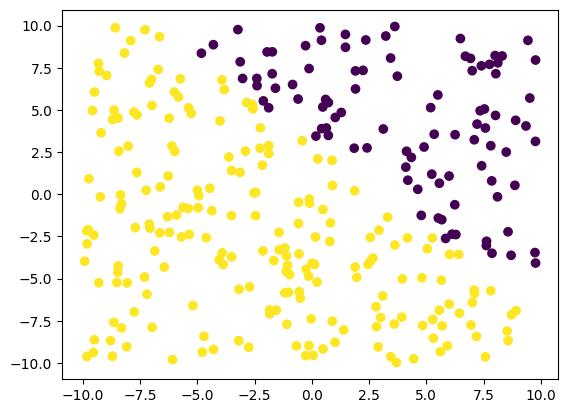

In [61]:

plt.scatter(x=X[:,0],y=X[:,1],c=(p>.5)+0)

# Non Linear data

In [72]:
y = (((X[:, 0]**2 + X[:, 1]**2)/numpy.pi) < 20).reshape(-1,1)+0
y.shape

(300, 1)

In [73]:
ix = list(range(len(X)))
numpy.random.shuffle(ix)
X,y = X[ix,:],y[ix,:]

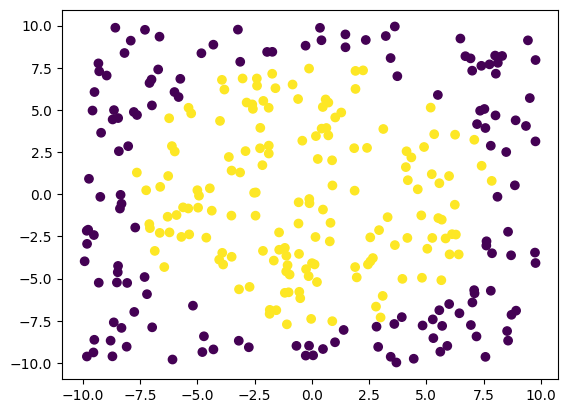

In [74]:
plt.scatter(x=X[:,0],y=X[:,1],c=y)

## Beyond logistic Regression

In [76]:
SoftmaxRegressor = architecture.Sequential(
        [
        layers.fullyconnected(n_out=1,k=2),
        layers.activation(func=activation_funcs.Softmax)
        ]
    )
class accuracy(metrics.accuracy):
    def __init__(self,y,p):
        _,p = p[0]
        self.p,self.y = p.argmax(axis=1),y.argmax(axis=1)

SoftmaxRegressor.train(utils.scaler(X),utils.onehot(y),
                        α=.04,
                        n_epochs=100,
                        cost=loss.CrossEntropy,
                        metrics=accuracy)


epoch 0 batch slice(0, 300, None) metrics 0.4766666666666667 cost 0.6931471805599453

epoch 1 batch slice(0, 300, None) metrics 0.5233333333333333 cost 0.6931452732837997

epoch 2 batch slice(0, 300, None) metrics 0.5233333333333333 cost 0.6931433691926363

epoch 3 batch slice(0, 300, None) metrics 0.5233333333333333 cost 0.693141468281136

epoch 4 batch slice(0, 300, None) metrics 0.5233333333333333 cost 0.6931395705439889

epoch 5 batch slice(0, 300, None) metrics 0.5233333333333333 cost 0.6931376759758934

epoch 6 batch slice(0, 300, None) metrics 0.5233333333333333 cost 0.6931357845715573

epoch 7 batch slice(0, 300, None) metrics 0.5233333333333333 cost 0.6931338963256972

epoch 8 batch slice(0, 300, None) metrics 0.5233333333333333 cost 0.693132011233038

epoch 9 batch slice(0, 300, None) metrics 0.5233333333333333 cost 0.6931301292883139

epoch 10 batch slice(0, 300, None) metrics 0.5233333333333333 cost 0.6931282504862676

epoch 11 batch slice(0, 300, None) metrics 0.523333333

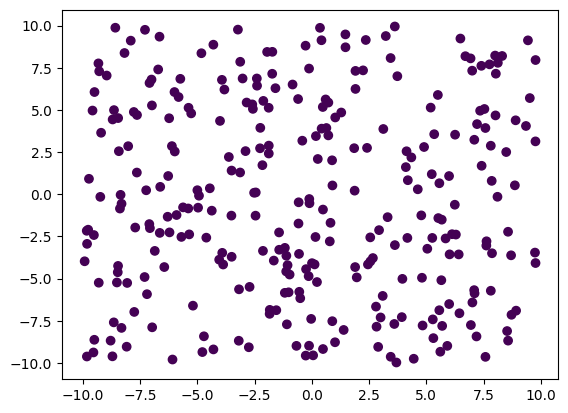

In [77]:
plt.scatter(x=X[:,0],y=X[:,1],c=p.argmax(axis=1))

## Neural Network

In [83]:
Network0 = architecture.Sequential(
        [
        layers.fullyconnected(n_out=30),
        layers.activation(),
        layers.fullyconnected(n_out=1),
        layers.activation()
        ]
    )
class accuracy(metrics.accuracy):
    def __init__(self,y,p):
        _,p = p[0]
        self.y,self.p = y,p>.5

Network0.train(X,y,
              α=.1,
              n_epochs=10,
              cost=loss.MSE,
                metrics=accuracy)


epoch 0 batch slice(0, 300, None) metrics 0.4766666666666667 cost 0.25

epoch 1 batch slice(0, 300, None) metrics 0.5233333333333333 cost 0.24946382521069316

epoch 2 batch slice(0, 300, None) metrics 0.5233333333333333 cost 0.24945917005557566

epoch 3 batch slice(0, 300, None) metrics 0.5233333333333333 cost 0.24945912813617363

epoch 4 batch slice(0, 300, None) metrics 0.5233333333333333 cost 0.24945911708183355

epoch 5 batch slice(0, 300, None) metrics 0.5233333333333333 cost 0.24945911345939598

epoch 6 batch slice(0, 300, None) metrics 0.5233333333333333 cost 0.24945910906582716

epoch 7 batch slice(0, 300, None) metrics 0.5233333333333333 cost 0.24945910478418976

epoch 8 batch slice(0, 300, None) metrics 0.5233333333333333 cost 0.2494591004953036

epoch 9 batch slice(0, 300, None) metrics 0.5233333333333333 cost 0.24945909621472495


In [35]:
Network0.steps[0].In = [(id(X),X)]
p=Network0.eval()

In [ ]:
loss.binaryCrossEntropy

In [44]:
p[1]

(1853357937008,
 array([[0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [

In [43]:
plt.scatter(x=X[:,0],y=X[:,1],c=p.argmax(axis=1))

AttributeError: 'list' object has no attribute 'argmax'

In [ ]:
Network.steps[-2].In[0]